# Multivariate Linear Regreaasion:
This notebook implements the multivariate linear regression algorithm from scratch using python based libraries.

### Get data ready
Data set is about house features and prices. We will use 2 variables for input which are size and rooms of house and we will predict the price of house which is the target variable.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("ex1data2.txt",header=None)
data=pd.DataFrame(data.values,columns=["Size","Rooms","Price"])

In [3]:
data.head()

,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Defining functions for Feature Normalization, Hypothesis Function, Cost functions (`j(theta)`) and Gradient descent

In [4]:
def feature_normalize(X):
    """
    Take features and return their normalized form.
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    normal=(X-mean)/std
    return normal 

def hyp_fn(X,theta):
    """
    Return the predicted values of y.
    """
    return np.dot(X,theta)

def j_theta(X,theta,y):
    """
    Evaluate the cost function.
    """
    m=len(y)
    predictions=hyp_fn(X,theta)
    squared_error=np.square(predictions-y)
    return 1/(2*m) * np.sum(squared_error)

def gradient_descent(iterations,learning_rate,X,y,theta):
    """
    It minimizes the cost function and return paramteres that minimize its cost.
    """
    m=len(y)
    j_dict=[] #will contain j(theta) values for each iterations.
    for i in range(iterations):
        predictions=hyp_fn(X,theta)
        error=predictions-y
        slope=1/m*np.dot(X.T,error)
        theta=theta-(learning_rate*slope)
        j_dict.append(j_theta(X,theta,y))
    return j_dict,theta

### Initializing X,y and theta

In [5]:
X1=data["Size"].to_numpy()
X2=data["Rooms"].to_numpy()
x=np.append(X1.reshape(len(X1),1),X2.reshape(len(X2),1),axis=1)
x=feature_normalize(x)
X=np.append(np.ones((len(X1),1)),x,axis=1)
y=data["Price"].to_numpy()
y=y.reshape(len(X1),1)
theta=np.zeros((3,1))

### Calculating Initial cost 

In [6]:
#before applying gradient descent
print(f"Cost= {j_theta(X,theta,y)}")

Cost= 65591548106.45744


### Applying Gradient descent 

In [7]:
j_dict,theta=gradient_descent(400,0.01,X,y,theta)

### Visualizing the Convergence of Cost Function

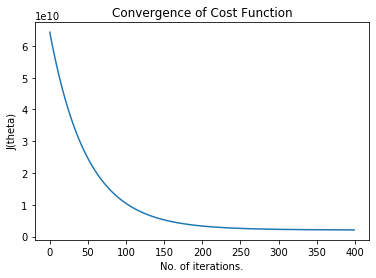

In [8]:
plt.plot(j_dict);
plt.title('Convergence of Cost Function');
plt.xlabel("No. of iterations.")
plt.ylabel("J(theta)");

In [9]:
#our parameters that yield this cost function
theta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [10]:
# this is how our hypothesis function looks like
print(f"h(x) = {theta[0,0]:.2f} + {theta[1,0]:.2f}x1 + {theta[2,0]:.2f}x2")

h(x) = 334302.06 + 99411.45x1 + 3267.01x2


### Making predictions using h(x)

In [11]:
def predict(x1,x2,theta):
    """
    Take a new feature and returns its predicted value.
    """
    x=feature_normalize([x1,x2])
    x=np.append(np.ones(1),x)
    prediction=np.dot(theta.T,x)
    print(f"Price of house given its size={x1} and rooms={x2}, is {prediction[0]:.2f}$ .")

In [19]:
predict(500,3,theta)

Price of house given its size=500 and rooms=3, is 430446.50$ .
